# Part 2 — Some Basic Concepts of the Theory of Sets

*Last updated: 21 January 2026*  
*(Based on Apostol, Calculus Vol. 1, Part 2, Sections 1.2.1–1.2.2)*

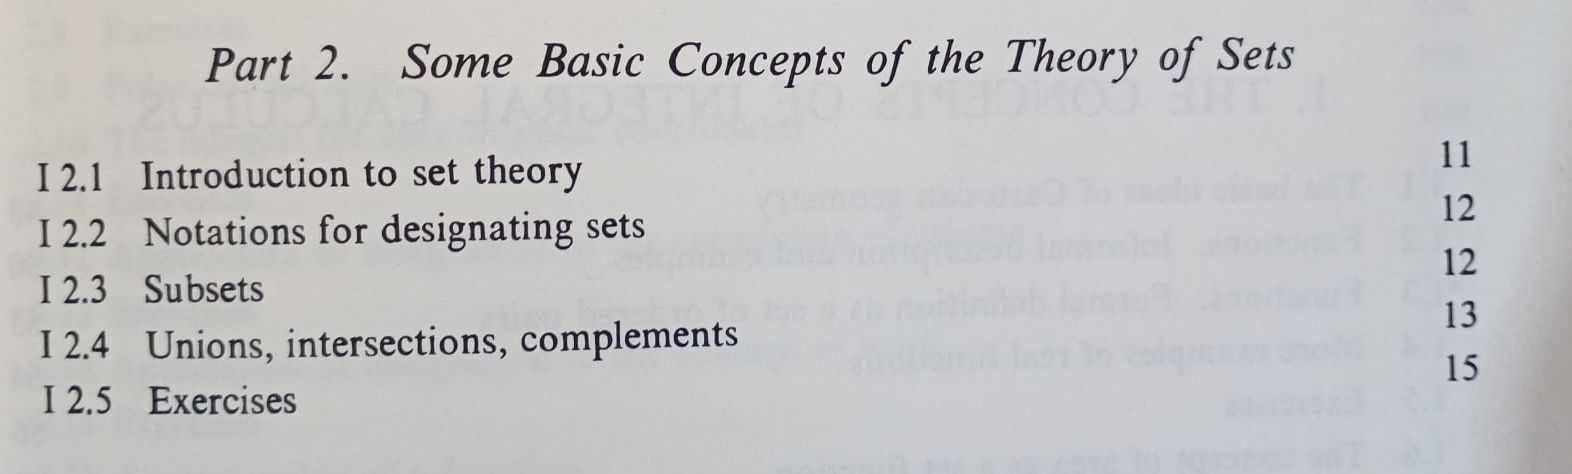

## Scope

This part of the project follows **Part 2** of Apostol’s *Calculus, Volume 1*, introducing the basic language and elementary operations of set theory.  
The aim is not to reproduce the book verbatim, but to reconstruct the same mathematical content in a precise, usable form and to prepare the ground for systematic work on the exercises.

All definitions and notations in this file are based on Apostol, §§1.2.1–1.2.2.

## 1. Introduction to Set Theory (§1.2.1)

In many areas of mathematics—such as analysis, algebra, and geometry—it is convenient to use a common formal language for describing collections of objects. This role is played by **set theory**. Historically, the development of this language is mainly due to **George Boole** and **Georg Cantor** in the second half of the nineteenth century, and it strongly influenced the shape of twentieth-century mathematics.

A full axiomatic treatment of set theory lies beyond the scope of Apostol’s book. Instead, only a **small number of basic concepts** are introduced, sufficient to serve as a practical working language for calculus and related subjects.

In mathematics, a **set** is understood as a collection of objects regarded as a single whole. The objects forming the collection are called the **elements** (or **members**) of the set.

If an object $x$ is an element of a set $S$, we write:
$$
x \in S.
$$
If $x$ is not an element of $S$, we write:
$$
x \notin S.
$$

A set is said to **contain** its elements, or to be **composed of** them.

In what follows, we are primarily concerned with **sets of mathematical objects**: sets of numbers, sets of curves, sets of geometric figures, and similar entities. In many applications, no special assumptions are made about the nature of the objects themselves; such collections are called **abstract sets**. The generality of this point of view is one of the main sources of the power of set-theoretic methods.

## 2. Notations for Designating Sets (§1.2.2)

By convention, sets are usually denoted by **capital letters**:
$$
A, B, C, \dots, X, Y, Z,
$$
and elements by **lower-case letters**:
$$
a, b, c, \dots, x, y, z.
$$

The notation
$$
x \in S
$$
is read as “$x$ is an element of $S$” or “$x$ belongs to $S$”. If $x$ does not belong to $S$, we write
$$
x \notin S.
$$

One way to specify a set is to list its elements explicitly inside braces. For example, the set of positive even integers less than $10$ can be written as
$$
\{2,4,6,8\}.
$$
The set of all positive even integers may be written as
$$
\{2,4,6,\dots\},
$$
where the dots indicate that the pattern continues in the obvious way. This method of describing a set is often called the **roster notation**.

### Equality of Sets

The first fundamental relation between two sets is **equality**.

**Definition (Equality of sets).**  
Two sets $A$ and $B$ are said to be **equal** if they consist of exactly the same elements. In this case we write
$$
A = B.
$$
If one of the sets contains an element that is not contained in the other, the sets are said to be unequal, and we write
$$
A \ne B.
$$

Two immediate consequences:

1. **Order is irrelevant** in roster notation:
$$
\{2,4,6,8\} = \{2,8,6,4\}.
$$

2. **Multiplicity is irrelevant** in roster notation:
$$
\{2,2,4,4,6,8\} = \{2,4,6,8\}.
$$

Thus, in roster notation, neither order nor multiplicity plays any role in determining the set.

A similar example is provided by the set of letters appearing in the word *Mississippi*, which is the set
$$
\{ M, i, s, p \}.
$$

> The next subsection (§1.2.3) introduces subsets and inclusion.


In [62]:
# ============================================================
# Libraries (clean, final, non-redundant)
# ============================================================

import math
from itertools import combinations

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse

# ------------------------------------------------------------
# Matplotlib style
# ------------------------------------------------------------
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Century Schoolbook", "Century", "New Century Schoolbook", "STIXGeneral", "Times New Roman"],
    "mathtext.fontset": "stix",
    "font.size": 20,
})

# ------------------------------------------------------------
# Optional: SymPy (ONLY if needed later)
# If SymPy is not installed, run once in a separate cell:
#     %pip install sympy
# ------------------------------------------------------------
# import sympy as sp


In [63]:
# Part 2 — §1.2.1–§1.2.2  (Applications only)
# One-cell, GitHub-readable, parameter-driven concept demo

# -------------------------
# PARAMETERS
# -------------------------
# What you show:
#   - Membership: which candidates satisfy x ∈ S (inside) vs x ∉ S (outside)
#   - Equality invariances: order & multiplicity do not affect a set
#   - "Distinct letters" roster example from a word
#
# What readers can modify:
#   1) S: change the set itself (membership & container bounds update)
#   2) candidates: change the tested objects (more/less points, wider range)
#   3) word: change the roster-style example (distinct letters)
#
# What to observe:
#   - Moving elements into/out of S changes which points fall "inside the box"
#   - Changing order or adding duplicates does not change set equality
#   - set(word) collapses repeated letters (roster notation idea)

S = {2, 4, 6, 8}
candidates = list(range(0, 21))   # try: range(-10, 31) or a custom list
word = "mississippi"

# Equality demos (readers can edit too)
A = {2, 4, 6, 8}
B = {8, 6, 4, 2}
C_multiset_like = [2, 2, 4, 4, 6, 8]

# Plot layout controls (safe to tweak)
FIGSIZE = (11.5, 3.4)
Y_IN, Y_OUT = 0.70, 0.22
BOX_Y0, BOX_H = 0.52, 0.30
LABEL_Y_STEP = 0.085   # vertical step to avoid collisions
LABEL_MAX_ROWS = 4     # max stacked rows before shifting slightly

# Academic-ish typography (no colors forced)
plt.rcParams.update({
    "font.family": "serif",
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

def _print_academic_report(S, candidates, A, B, C_multiset_like, word):
    print("\n" + "="*76)
    print("Apostol (Vol. 1) — Part 2, §§1.2.1–1.2.2 : Computational Companion (Applications)")
    print("="*76)

    # Membership table
    print("\n[Membership]  x ∈ S vs x ∉ S")
    print(f"S = {sorted(S)}")
    print("x | relation")
    print("--+---------")
    for x in candidates:
        print(f"{x:>2} | {'∈ S' if x in S else '∉ S'}")

    # Equality checks
    print("\n[Equality]  Order and multiplicity do not affect a set")
    C = set(C_multiset_like)
    print(f"A = {sorted(A)}")
    print(f"B = {sorted(B)}   (same elements, permuted)")
    print(f"A == B  -> {A == B}")
    print(f"C_multiset_like (list) = {C_multiset_like}")
    print(f"set(C_multiset_like)   = {sorted(C)}")
    print(f"A == set(C_multiset_like)  -> {A == C}")

    # Roster from word
    letters = set(word)
    print("\n[Roster-style example]  Distinct letters in a word")
    print(f"word = '{word}'")
    print(f"set(word) = {sorted(letters)}")
    print(f"|set(word)| = {len(letters)}")

    # Explicit "what to edit"
    print("\n[How to modify / what to observe]")
    print("1) Edit S        -> membership outcomes and box boundaries change.")
    print("2) Edit candidates -> more/less tested objects; plot becomes denser/sparser.")
    print("3) Edit word     -> distinct-letter set changes (duplicates collapse).")
    print("="*76 + "\n")

def _place_labels(ax, xs, base_y, step=0.08, max_rows=4):
    """
    Places text labels above points without overlapping each other too badly.
    Strategy: stack labels vertically when x repeats or points are too close.
    """
    # Sort and bucket by proximity
    xs_sorted = sorted(xs)
    buckets = []
    eps = 0.55  # proximity threshold on x-axis (tuned for integer-ish x)
    for x in xs_sorted:
        if not buckets or abs(x - buckets[-1][-1]) > eps:
            buckets.append([x])
        else:
            buckets[-1].append(x)

    for bucket in buckets:
        # For each x in bucket, stack vertically; if too many, slight x-shift
        for i, x in enumerate(bucket):
            row = i % max_rows
            col = i // max_rows
            x_shift = 0.18 * col
            y = base_y + step * row
            ax.text(x + x_shift, y, str(x),
                    ha="center", va="bottom", fontsize=9,
                    bbox=dict(boxstyle="round,pad=0.2", linewidth=0.6, facecolor="white", alpha=0.85))

def _plot_membership(S, candidates):
    in_pts  = [x for x in candidates if x in S]
    out_pts = [x for x in candidates if x not in S]

    fig, ax = plt.subplots(figsize=FIGSIZE)

    # Determine horizontal bounds
    xmin = min(candidates) - 1
    xmax = max(candidates) + 1

    # Box bounds: span of S, if nonempty; otherwise small placeholder
    if len(S) > 0:
        box_xmin = min(S) - 1
        box_xmax = max(S) + 1
    else:
        box_xmin = xmin
        box_xmax = xmin + 2

    # Draw container (conceptual)
    box = Rectangle((box_xmin, BOX_Y0), box_xmax - box_xmin, BOX_H, fill=False, linewidth=2)
    ax.add_patch(box)
    ax.text((box_xmin + box_xmax)/2, BOX_Y0 + BOX_H + 0.045, "S",
            ha="center", va="bottom", fontsize=12)

    # Plot points (no forced colors)
    ax.scatter(in_pts,  [Y_IN]*len(in_pts),  s=120)
    ax.scatter(out_pts, [Y_OUT]*len(out_pts), s=70)

    # Labels with collision-avoidance
    _place_labels(ax, in_pts,  base_y=Y_IN + 0.02, step=LABEL_Y_STEP, max_rows=LABEL_MAX_ROWS)
    _place_labels(ax, out_pts, base_y=Y_OUT + 0.02, step=LABEL_Y_STEP, max_rows=LABEL_MAX_ROWS)

    # Academic title and annotation
    ax.set_title(r"Membership as a predicate: inside $\Leftrightarrow x \in S$, outside $\Leftrightarrow x \notin S$")
    ax.set_xlabel("candidate objects (layout axis)")
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(-0.05, 1.05)
    ax.set_yticks([])

    # Clean spines
    for sp in ["left", "right", "top"]:
        ax.spines[sp].set_visible(False)

    plt.show()

def run_demo(S, candidates, word, A, B, C_multiset_like):
    _print_academic_report(S, candidates, A, B, C_multiset_like, word)
    _plot_membership(S, candidates)

    # sanity checks
    assert A == B, "A and B should be equal sets (order irrelevant)."
    assert A == set(C_multiset_like), "Duplicates should not affect the set."
    assert set(word) == set(list(word)), "Word -> set conversion sanity check failed."
    print("Sanity checks passed.")

# -------------------------
# OPTIONAL: WIDGET MODE
# -------------------------
# If ipywidgets exists, we expose small controls.
try:
    import ipywidgets as widgets
    from IPython.display import display, clear_output

    s_input = widgets.Text(
        value="2,4,6,8",
        description="S",
        layout=widgets.Layout(width="320px")
    )
    cand_min = widgets.IntSlider(value=0, min=-50, max=50, step=1, description="cand_min")
    cand_max = widgets.IntSlider(value=20, min=-50, max=100, step=1, description="cand_max")
    word_input = widgets.Text(value=word, description="word", layout=widgets.Layout(width="320px"))

    btn = widgets.Button(description="Run / Update", button_style="")
    out = widgets.Output()

    def parse_set(text):
        text = text.strip()
        if text == "":
            return set()
        return {int(t.strip()) for t in text.split(",") if t.strip() != ""}

    def on_click(_):
        with out:
            clear_output(wait=True)
            S_local = parse_set(s_input.value)
            cmin, cmax = cand_min.value, cand_max.value
            if cmin > cmax:
                cmin, cmax = cmax, cmin
            candidates_local = list(range(cmin, cmax + 1))
            run_demo(S_local, candidates_local, word_input.value, A, B, C_multiset_like)

    btn.on_click(on_click)

    display(widgets.VBox([
        widgets.HTML("<b>Interactive controls: edit S and candidate range, then run</b>"),
        widgets.HBox([s_input, word_input]),
        widgets.HBox([cand_min, cand_max, btn]),
        out
    ]))

    # initial run
    on_click(None)

except Exception:
    # Fallback: plain run (works everywhere)
    run_demo(S, candidates, word, A, B, C_multiset_like)


## 3. Subsets (§1.2.3)

Given a set $S$, it is often useful to form new sets by selecting some of its elements. Any set obtained in this way is called a **subset** of $S$. For instance, among the positive integers less than $10$, the numbers divisible by $4$ form the set $\{4,8\}$ which is a subset of the even positive integers less than $10$. This motivates the following definition.

**Definition (Subset).**  
A set $A$ is said to be a **subset** of a set $B$ if every element of $A$ also belongs to $B$. In this case we write
$$
A \subseteq B.
$$
Equivalently: $A$ is **contained in** $B$, and $B$ **contains** $A$. The relation $\subseteq$ is called **set inclusion**.

### Equality and Proper Subsets

The inclusion statement $A \subseteq B$ does not rule out the possibility that $B \subseteq A.$ In fact, both inclusions hold simultaneously **if and only if** $A$ and $B$ have exactly the same elements:
$$
A = B \quad \Longleftrightarrow \quad A \subseteq B \ \text{and} \ B \subseteq A.
$$

If
$$
A \subseteq B \quad \text{but} \quad A \ne B,
$$
then $A$ is called a **proper subset** of $B$, denoted by
$$
A \subset B.
$$

### Universal Set and Set-Builder Notation

In most applications, a fixed set $S$ is chosen in advance and attention is restricted to subsets of this set. This underlying set $S$ is called the **universal set** for the given context.

The notation
$$
\{\, x \mid x \in S \ \text{and} \ x \text{ satisfies } P \,\}
$$
denotes the set of all elements $x$ in $S$ satisfying a property $P$.

When the universal set is clear from the context, we suppress $x \in S$ and write
$$
\{\, x \mid x \text{ satisfies } P \,\}.
$$
Such sets are said to be **defined by a property**.

Examples:

- Positive real numbers:
$$
\{\, x \mid x > 0 \,\}
$$
(understood within the real numbers).

- Positive even integers:
$$
\{\, x \mid x \text{ is a positive even integer} \,\}.
$$

The symbol $x$ here is a **dummy variable**; it may be replaced by any other symbol without changing the set:
$$
\{\, x \mid x > 0 \,\} = \{\, y \mid y > 0 \,\} = \{\, t \mid t > 0 \,\}.
$$

### The Empty Set

A set may contain **no elements**. Such a set is called the **empty set** (or **void set**) and is denoted by $\varnothing.$
By convention,
$$
\varnothing \subseteq A \quad \text{for every set } A.
$$

It is often helpful to think of a set as a container holding its elements. In this analogy, the empty set corresponds to an **empty container**.

### The Difference Between $x$ and $\{x\}$

To avoid confusion, one must distinguish an element $x$ from the **one-element set** $\{x\}$ whose only element is $x$. In particular,
$$
\varnothing \ne \{\varnothing\}.
$$
The set $\varnothing$ has **no elements**, whereas $\{\varnothing\}$ has **exactly one element**, namely $\varnothing$ itself.
 Sets consisting of exactly one element are called **one-element sets**.

### Diagrams and Visualization

Diagrams can be useful for intuition. One may represent a set $S$ as a region and its elements as points; subsets correspond to subregions. A shaded region can indicate a set that is simultaneously a subset of two different sets (cf. Figure 1.6(b) in Apostol).

Such **Venn-type diagrams** are aids for intuition and plausibility checks. Proofs, however, must rely on definitions and logical reasoning rather than on diagrams.


In [64]:
# Apostol, Calculus Vol. 1 — Part 2, §1.2.3 (Subsets)
# Interactive if ipywidgets exists; otherwise edit FALLBACKS and rerun.
# -----------------------------
# Typography  (MATCHES your §1.2.1–§1.2.2 cell)
# -----------------------------
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": [
        "Century Schoolbook", "New Century Schoolbook",
        "Times New Roman", "Palatino", "DejaVu Serif"
    ],
    "axes.titlesize": 12,   # <-- same as your previous cell
    "axes.labelsize": 11,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
})

# -----------------------------
# FALLBACK PARAMETERS
# -----------------------------
U0 = set(range(1, 13))                 # finite universal set for visualization
A0 = {4, 8}                            # subset candidate
B0 = {2, 4, 6, 8, 10, 12}              # reference set
P_label0 = "x mod 3 = 0"               # keep as plain text (no \bmod)
def P0(x): return (x % 3 == 0)

MAX_ANNOT = 10                         # max labels per row

# -----------------------------
# Core helpers (pure set logic)
# -----------------------------
def is_subset(A, B):
    return set(A).issubset(set(B))

def is_proper_subset(A, B):
    A, B = set(A), set(B)
    return A.issubset(B) and A != B

def set_builder(U, pred):
    return {x for x in U if pred(x)}

def status_ascii(A, B):
    # ASCII-only (stable across fonts)
    if is_proper_subset(A, B):
        return "A < B (proper subset)"
    if is_subset(A, B):
        return "A <= B (subset)"
    return "A not<= B (not a subset)"

# -----------------------------
# Visualization (application)
# -----------------------------
def draw_subset_dashboard(U, A, B, P_label, pred, max_annot=10):
    r"""
    Apostol §1.2.3 companion (finite U for visualization).

    Partition of U shown in four disjoint rows:
      Row 1: A
      Row 2: B \ A
      Row 3: P \ B   where P = { x in U : P(x) }
      Row 4: U \ (A U B U P)
    """
    U, A, B = set(U), set(A), set(B)
    Pset = set_builder(U, pred)

    # Clip to U (keep interpretation consistent)
    A &= U
    B &= U
    Pset &= U

    # Disjoint partition
    row_A     = A
    row_Bonly = B - A
    row_Ponly = Pset - B
    row_rest  = U - (row_A | row_Bonly | row_Ponly)

    xs = sorted(U) if U else [0]
    xmin, xmax = min(xs) - 1, max(xs) + 1

    rows = [
        ("A", row_A, 3.0),
        ("B \\ A", row_Bonly, 2.0),
        (f"{{x in U : {P_label}}} \\ B", row_Ponly, 1.0),
        ("U \\ (A U B U P)", row_rest, 0.0),
    ]

    fig, ax = plt.subplots(figsize=(12.5, 4.8))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(-0.7, 3.7)
    ax.set_yticks([])
    ax.set_xlabel("elements of the (finite) universal set U")

    for sp in ["left", "right", "top"]:
        ax.spines[sp].set_visible(False)

    for name, _, y in rows:
        ax.hlines(y, xmin, xmax, linewidth=0.9, alpha=0.25)
        ax.text(xmin + 0.15, y + 0.18, name, ha="left", va="bottom", fontsize=11)

    def plot_row(S, y, annotate=False):
        S = sorted(S)
        if not S:
            return
        ax.scatter(S, [y]*len(S), s=130)
        if annotate:
            for x in S[:max_annot]:
                ax.text(x, y + 0.22, str(x), ha="center", va="bottom", fontsize=10)

    plot_row(row_A,     3.0, annotate=True)
    plot_row(row_Bonly, 2.0, annotate=True)
    plot_row(row_Ponly, 1.0, annotate=True)
    plot_row(row_rest,  0.0, annotate=False)

    ax.set_title(f"Apostol §1.2.3 (finite U): {status_ascii(A, B)}  |  P(x): {P_label}")

    ax.text(
        xmax, -0.45,
        "Rows are disjoint (a partition of U), so no element appears twice.",
        ha="right", va="center", fontsize=10, alpha=0.85
    )

    plt.show()

# -----------------------------
# Widget mode (optional) — auto refresh on change
# -----------------------------
try:
    import ipywidgets as widgets
    from IPython.display import display, clear_output

    def parse_int_set(text):
        text = text.strip()
        if text == "":
            return set()
        return {int(t.strip()) for t in text.split(",") if t.strip() != ""}

    U_min = widgets.IntSlider(value=1, min=-30, max=30, step=1, description="U_min")
    U_max = widgets.IntSlider(value=12, min=-30, max=60, step=1, description="U_max")
    A_text = widgets.Text(value="4,8", description="A", layout=widgets.Layout(width="260px"))
    B_text = widgets.Text(value="2,4,6,8,10,12", description="B", layout=widgets.Layout(width="340px"))

    pred_choice = widgets.Dropdown(
        options=[
            ("x mod 3 = 0", "mod3"),
            ("x mod 4 = 0", "mod4"),
            ("x is even", "even"),
            ("x > 6", "gt6"),
        ],
        value="mod3",
        description="P(x)"
    )

    def make_pred(key):
        if key == "mod3": return (lambda x: x % 3 == 0), "x mod 3 = 0"
        if key == "mod4": return (lambda x: x % 4 == 0), "x mod 4 = 0"
        if key == "even": return (lambda x: x % 2 == 0), "x is even"
        if key == "gt6":  return (lambda x: x > 6),       "x > 6"
        return (lambda x: False), "False"

    out = widgets.Output()

    def refresh(*_):
        with out:
            clear_output(wait=True)
            umin, umax = U_min.value, U_max.value
            if umin > umax:
                umin, umax = umax, umin

            U = set(range(umin, umax + 1))
            A = parse_int_set(A_text.value)
            B = parse_int_set(B_text.value)
            pred, label = make_pred(pred_choice.value)

            draw_subset_dashboard(U, A, B, label, pred, max_annot=MAX_ANNOT)

    for w in [U_min, U_max, A_text, B_text, pred_choice]:
        w.observe(refresh, names="value")

    display(widgets.VBox([
        widgets.HBox([U_min, U_max]),
        widgets.HBox([A_text, B_text, pred_choice]),
        out
    ]))

    refresh()

except Exception:
    draw_subset_dashboard(U0, A0, B0, P_label0, P0, max_annot=MAX_ANNOT)


## 4. Unions, Intersections, Complements (§1.2.4)

Let $A$ and $B$ be sets. Using them we form new sets that capture the ideas:
“in $A$ or $B$”, “in both”, and “in $A$ but not in $B$”.

### 4.1 Union

The **union** of $A$ and $B$ is written as $A \cup B$ and contains all elements that are in at least one of the sets.

$$
A \cup B
$$

Formally,

$$
A \cup B = \{\,x \mid x \in A \ \text{or}\ x \in B\,\}.
$$

Geometrically (Venn-style), this corresponds to the entire region covered by $A$ together with the entire region covered by $B$.

### 4.2 Intersection

The **intersection** of $A$ and $B$ is written as $A \cap B$ and contains exactly the elements common to both sets.

$$
A \cap B
$$

Formally,

$$
A \cap B = \{\,x \mid x \in A \ \text{and}\ x \in B\,\}.
$$

If there is no common element, the intersection is empty:

$$
A \cap B = \varnothing.
$$

In that case $A$ and $B$ are called **disjoint**.


### 4.3 Difference (Relative Complement)

The **difference** $A - B$ (also called the **relative complement** of $B$ in $A$) consists of elements in \(A\) that are not in $B$.

$$
A - B = \{\,x \mid x \in A \ \text{and}\ x \notin B\,\}.
$$

Similarly,

$$
B - A = \{\,x \mid x \in B \ \text{and}\ x \notin A\,\}.
$$

### 4.4 Algebraic Properties

These operations satisfy familiar structural rules.

**Commutativity**
$$
A \cup B = B \cup A,
\qquad
A \cap B = B \cap A.
$$

**Associativity**
$$
(A \cup B)\cup C = A \cup (B \cup C),
\qquad
(A \cap B)\cap C = A \cap (B \cap C).
$$

Hence expressions such as
$$
A_1 \cup A_2 \cup \cdots \cup A_n,
\qquad
A_1 \cap A_2 \cap \cdots \cap A_n
$$
are unambiguous.

### 4.5 Unions and Intersections of Families of Sets

A collection (family) of sets is often denoted by a script letter such as $\mathcal{F}$.

For a nonempty family $\mathcal{F}$, define:

**Union over a family**
$$
\bigcup_{A \in \mathcal{F}} A
$$
which contains elements belonging to at least one member of $\mathcal{F}$.

**Intersection over a family**
$$
\bigcap_{A \in \mathcal{F}} A
$$
which contains elements belonging to every member of $\mathcal{F}$.

If $\mathcal{F}=\{A_1,\dots,A_n\}$ is finite, then

$$
\bigcup_{A\in\mathcal{F}} A
=
\bigcup_{k=1}^{n} A_k
=
A_1 \cup \cdots \cup A_n,
$$

and

$$
\bigcap_{A\in\mathcal{F}} A
=
\bigcap_{k=1}^{n} A_k
=
A_1 \cap \cdots \cap A_n.
$$


In [66]:
# ---- core drawing primitives ----
def _setup_ax(ax):
    ax.set_aspect("equal")
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.axis("off")

def _ellipse(center, w, h, angle=0, **kwargs):
    return Ellipse(center, w, h, angle=angle, **kwargs)

def draw_panel(ax, mode, dx=0.0, dy=0.0, angleA=18, angleB=18):
    """
    mode: 'union' | 'intersection' | 'disjoint'
    dx,dy: move B relative to default position (interactive)
    """
    _setup_ax(ax)

    # Base geometry (close to the book-like layout)
    A_center = (4.2, 3.1)
    B_center = (7.2 + dx, 3.4 + dy)

    A_w, A_h = 6.4, 4.2
    B_w, B_h = 3.6, 2.8

    if mode == "disjoint":
        B_center = (8.6 + dx, 4.2 + dy)
        B_w, B_h = 3.2, 2.4

    # Outlines
    A_outline = _ellipse(A_center, A_w, A_h, angle=angleA,
                        edgecolor="black", facecolor="none", linewidth=1.4)
    B_outline = _ellipse(B_center, B_w, B_h, angle=angleB,
                        edgecolor="black", facecolor="none", linewidth=1.4)

    # Shading logic
    if mode == "union":
        A_fill = _ellipse(A_center, A_w, A_h, angle=angleA,
                          edgecolor="black", facecolor="0.85", linewidth=1.4)
        B_fill = _ellipse(B_center, B_w, B_h, angle=angleB,
                          edgecolor="black", facecolor="0.85", linewidth=1.4)
        ax.add_patch(A_fill)
        ax.add_patch(B_fill)

    elif mode == "intersection":
        ax.add_patch(A_outline)
        ax.add_patch(B_outline)

        # Fill B, clipped to A => intersection
        shaded = _ellipse(B_center, B_w, B_h, angle=angleB,
                          edgecolor="none", facecolor="0.85")
        shaded.set_clip_path(A_outline)
        ax.add_patch(shaded)

    elif mode == "disjoint":
        ax.add_patch(A_outline)
        ax.add_patch(B_outline)

    # Add outlines on top if union filled
    if mode == "union":
        ax.add_patch(_ellipse(A_center, A_w, A_h, angle=angleA,
                              edgecolor="black", facecolor="none", linewidth=1.4))
        ax.add_patch(_ellipse(B_center, B_w, B_h, angle=angleB,
                              edgecolor="black", facecolor="none", linewidth=1.4))

    # Labels
    ax.text(3.2, 2.3, "A", fontsize=12)
    ax.text(B_center[0] + 0.2, B_center[1] - 0.4, "B", fontsize=12)

    # Caption
    if mode == "union":
        cap = r"(a)  $A \cup B$"
    elif mode == "intersection":
        cap = r"(b)  $A \cap B$"
    else:
        cap = r"(c)  $A \cap B = \varnothing$"
    ax.text(5.0, 0.55, cap, ha="center", fontsize=12)

def render_figure(dx=0.0, dy=0.0, angleA=18, angleB=18):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3.6))
    draw_panel(axes[0], "union", dx=dx, dy=dy, angleA=angleA, angleB=angleB)
    draw_panel(axes[1], "intersection", dx=dx, dy=dy, angleA=angleA, angleB=angleB)
    draw_panel(axes[2], "disjoint", dx=dx, dy=dy, angleA=angleA, angleB=angleB)
    fig.suptitle("Interactive Figure: Unions and Intersections", fontsize=12, y=0.98)
    plt.tight_layout()
    plt.show()

# ---- try ipywidgets for interactivity ----
try:
    import ipywidgets as widgets
    from IPython.display import display

    ui = widgets.VBox([
        widgets.HTML("<b>Move set B (dx, dy) and rotate ellipses</b>"),
        widgets.HBox([
            widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description="dx"),
            widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description="dy"),
        ]),
        widgets.HBox([
            widgets.IntSlider(value=18, min=-45, max=45, step=1, description="angleA"),
            widgets.IntSlider(value=18, min=-45, max=45, step=1, description="angleB"),
        ])
    ])

    dx_slider, dy_slider = ui.children[1].children
    aA_slider, aB_slider = ui.children[2].children

    out = widgets.interactive_output(
        render_figure,
        {"dx": dx_slider, "dy": dy_slider, "angleA": aA_slider, "angleB": aB_slider}
    )

    display(ui, out)

except Exception as e:
    print("ipywidgets not available; showing static figure instead.")
    render_figure()

Output()

# Exercises (Apostol, Vol. 1, pp. 38–39)

## Exercise 1: Use the roster notation to designate the following sets of real numbers

$$
A = \{x \mid x^2 - 1 = 0\}
$$

$$
B = \{x \mid (x - 1)^2 = 0\}
$$

$$
C = \{x \mid x + 8 = 9\}
$$

$$
D = \{x \mid x^3 - 2x^2 + x = 2\}
$$

$$
E = \{x \mid (x + 8)^2 = 9^2\}
$$

$$
F = \{x \mid (x^2 + 16x)^2 = 17^2\}
$$


## Solutions


### A)

$$
x^2 - 1 = 0
$$

$$
x^2 = 1
$$

$$
x = \pm 1
$$

$$
A = \{-1, 1\}
$$


### B)

$$
(x - 1)^2 = 0
$$

$$
x - 1 = 0
$$

$$
x = 1
$$

$$
B = \{1\}
$$


### C)

$$
x + 8 = 9
$$

$$
x = 1
$$

$$
C = \{1\}
$$


### D)

$$
x^3 - 2x^2 + x = 2
$$

$$
x^3 - 2x^2 + x - 2 = 0
$$

$$
(x^3 - 2x^2) + (x - 2) = 0
$$

$$
x^2(x - 2) + (x - 2) = 0
$$

$$
(x - 2)(x^2 + 1) = 0
$$

$$
x = 2
$$

$$
x^2 + 1 = 0 \Rightarrow x = \pm i \quad (\text{not real})
$$

$$
D = \{2\}
$$

### E)

$$
(x + 8)^2 = 9^2
$$

$$
x + 8 = \pm 9
$$

$$
x = 1, \quad x = -17
$$

$$
E = \{-17, 1\}
$$

### F)

$$
(x^2 + 16x)^2 = 17^2
$$

$$
x^2 + 16x = \pm 17
$$


#### Case 1:

$$
x^2 + 16x = 17
$$

$$
x^2 + 16x - 17 = 0
$$

$$
\Delta = 256 + 68 = 324
$$

$$
x = 1, \quad x = -17
$$

#### Case 2:

$$
x^2 + 16x = -17
$$

$$
x^2 + 16x + 17 = 0
$$

$$
\Delta = 256 - 68 = 188 = 4 \cdot 47
$$

$$
x = -8 \pm \sqrt{47}
$$

$$
F = \{-17, 1, -8 - \sqrt{47}, -8 + \sqrt{47}\}
$$

$$
A = \{-1, 1\}
$$

$$
B = \{1\}
$$

$$
C = \{1\}
$$

$$
D = \{2\}
$$

$$
E = \{-17, 1\}
$$

$$
F = \{-17, 1, -8 - \sqrt{47}, -8 + \sqrt{47}\}
$$


A = { -1, 1 }
B = { 1 }
C = { 1 }
D = { 2 }
E = { -17, 1 }
F = { -17, 1, -8 - sqrt(47), -8 + sqrt(47) } ≈ { -17, 1, -14.855655, -1.144345 }

Checks (should be 0 or extremely close to 0):
A: [0, 0]
B: [0]
C: [0]
D: [0]
E: [0, 0]
F: [0, 0, 0.0, 1.1368683772161603e-13]


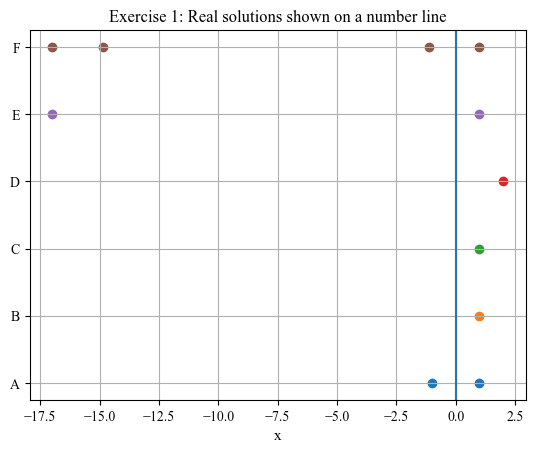

In [67]:
# Exercise 1 — Roster sets + optional visualization (NO sympy required)
# --- 1) Sets (computed from the algebraic solutions) ---

A = [-1, 1]
B = [1]
C = [1]
D = [2]
E = [-17, 1]

# F has two exact radicals; we'll keep BOTH:
# - an "exact" text version (nice for roster)
# - a numeric version (needed for plotting)
sqrt47 = math.sqrt(47)

F_numeric = [-17, 1, -8 - sqrt47, -8 + sqrt47]
F_exact_text = ["-17", "1", "-8 - sqrt(47)", "-8 + sqrt(47)"]

def roster_numeric(lst, digits=6):
    # numeric roster for printing (rounded)
    return "{ " + ", ".join(f"{v:.{digits}f}".rstrip("0").rstrip(".") for v in lst) + " }"

def roster_text(lst):
    # exact (string) roster for printing
    return "{ " + ", ".join(lst) + " }"

print("A =", roster_numeric(A, digits=0))
print("B =", roster_numeric(B, digits=0))
print("C =", roster_numeric(C, digits=0))
print("D =", roster_numeric(D, digits=0))
print("E =", roster_numeric(E, digits=0))
print("F =", roster_text(F_exact_text), "≈", roster_numeric(F_numeric, digits=6))

# --- 2) Optional: quick verification (plugging into LHS-RHS) ---

def check_A(x): return x*x - 1
def check_B(x): return (x-1)**2
def check_C(x): return x + 8 - 9
def check_D(x): return x**3 - 2*x**2 + x - 2
def check_E(x): return (x+8)**2 - 81
def check_F(x): return (x**2 + 16*x)**2 - 289

print("\nChecks (should be 0 or extremely close to 0):")
print("A:", [check_A(t) for t in A])
print("B:", [check_B(t) for t in B])
print("C:", [check_C(t) for t in C])
print("D:", [check_D(t) for t in D])
print("E:", [check_E(t) for t in E])
print("F:", [check_F(t) for t in F_numeric])

# --- 3) Optional visualization: number line plot ---
# If you don't care about plotting, you can delete everything below this line.

sets = {
    "A": A,
    "B": B,
    "C": C,
    "D": D,
    "E": E,
    "F": F_numeric
}

# Prepare plot
plt.figure()
y = 0
yticks = []
yticklabels = []

# Plot each set on a separate horizontal level
for i, (name, values) in enumerate(sets.items()):
    y = i
    plt.scatter(values, [y]*len(values))
    yticks.append(y)
    yticklabels.append(name)

# Pretty axes
plt.yticks(yticks, yticklabels)
plt.axvline(0)  # zero reference line
plt.xlabel("x")
plt.title("Exercise 1: Real solutions shown on a number line")
plt.grid(True)
plt.show()


## Exercise 2: Inclusion relations

For the sets in Exercise 1, note that $B \subseteq A$. List all inclusion relations $\subseteq$ that hold among the sets $A, B, C, D, E, F$.

## Solution

From Exercise 1:

$
A=\{-1,1\},\quad
B=\{1\},\quad
C=\{1\},\quad
D=\{2\},\quad
E=\{1,-17\},\quad
F=\{1,-17,-8+\sqrt{47},-8-\sqrt{47}\}.
$

Nontrivial inclusions:

$$
B \subseteq A,\qquad C \subseteq A
$$

$$
B \subseteq C,\qquad C \subseteq B
$$

$$
B \subseteq E,\qquad C \subseteq E
$$

$$
B \subseteq F,\qquad C \subseteq F
$$

$$
E \subseteq F
$$

(Trivial relations $X \subseteq X$ hold for each set $X\in\{A,B,C,D,E,F\}$.)

In [69]:
# Exercise 2 — Inclusion relations among A, B, C, D, E, F
# --- Define the sets from Exercise 1 ---
A = {-1, 1}
B = {1}
C = {1}
D = {2}
E = {1, -17}
# NOTE: F contains irrationals; we keep numeric values for computation.
F = {1, -17, -8 + math.sqrt(47), -8 - math.sqrt(47)}

sets = {"A": A, "B": B, "C": C, "D": D, "E": E, "F": F}

# --- Helper: roster-like string (sort by numeric value for stable output) ---
def roster(s):
    lst = sorted(s, key=float)
    return "{ " + ", ".join(str(v) for v in lst) + " }"

print("Sets:")
for name, s in sets.items():
    print(f"{name} = {roster(s)}")

# --- Detect equal sets (important here: B == C) ---
equal_groups = []
used = set()
names = list(sets.keys())
for i, ni in enumerate(names):
    if ni in used:
        continue
    grp = [ni]
    for nj in names[i+1:]:
        if sets[ni] == sets[nj]:
            grp.append(nj)
    for g in grp:
        used.add(g)
    equal_groups.append(grp)

print("\nEqual-set groups:")
for grp in equal_groups:
    if len(grp) > 1:
        print(" = ".join(grp))
    else:
        print(grp[0])

# --- Compute inclusion relations X ⊆ Y ---
relations = [(Xn, Yn) for Xn, X in sets.items() for Yn, Y in sets.items() if X.issubset(Y)]

# Split trivial vs nontrivial
trivial = [(x, y) for (x, y) in relations if x == y]
nontrivial = [(x, y) for (x, y) in relations if x != y]

# --- Print results (stable order) ---
def sort_pairs(pairs):
    return sorted(pairs, key=lambda t: (t[0], t[1]))

print("\nAll inclusion relations X ⊆ Y (including trivial):\n")
for x, y in sort_pairs(relations):
    print(f"{x} ⊆ {y}")

print("\nNontrivial inclusion relations (X ⊆ Y, X ≠ Y):\n")
for x, y in sort_pairs(nontrivial):
    print(f"{x} ⊆ {y}")

# --- Grouped view: for each X, list all Y such that X ⊆ Y ---
print("\nGrouped view:\n")
for Xn in names:
    Ys = [Yn for Yn in names if sets[Xn].issubset(sets[Yn])]
    print(f"{Xn} ⊆ " + ", ".join(Ys))

# --- Minimal inclusion edges (Hasse-style, removes transitive edges) ---
# We list only X ⊂ Y where there is no Z with X ⊂ Z ⊂ Y
def proper_subset(X, Y):
    return X.issubset(Y) and X != Y

cover_edges = []
for x in names:
    for y in names:
        if proper_subset(sets[x], sets[y]):
            # check if there exists z such that x ⊂ z ⊂ y
            has_middle = False
            for z in names:
                if z != x and z != y and proper_subset(sets[x], sets[z]) and proper_subset(sets[z], sets[y]):
                    has_middle = True
                    break
            if not has_middle:
                cover_edges.append((x, y))

print("\nMinimal (cover) relations (Hasse edges):\n")
for x, y in sort_pairs(cover_edges):
    print(f"{x} ⊂ {y}")


Sets:
A = { -1, 1 }
B = { 1 }
C = { 1 }
D = { 2 }
E = { -17, 1 }
F = { -17, -14.855654600401044, -1.144345399598956, 1 }

Equal-set groups:
A
B = C
D
E
F

All inclusion relations X ⊆ Y (including trivial):

A ⊆ A
B ⊆ A
B ⊆ B
B ⊆ C
B ⊆ E
B ⊆ F
C ⊆ A
C ⊆ B
C ⊆ C
C ⊆ E
C ⊆ F
D ⊆ D
E ⊆ E
E ⊆ F
F ⊆ F

Nontrivial inclusion relations (X ⊆ Y, X ≠ Y):

B ⊆ A
B ⊆ C
B ⊆ E
B ⊆ F
C ⊆ A
C ⊆ B
C ⊆ E
C ⊆ F
E ⊆ F

Grouped view:

A ⊆ A
B ⊆ A, B, C, E, F
C ⊆ A, B, C, E, F
D ⊆ D
E ⊆ E, F
F ⊆ F

Minimal (cover) relations (Hasse edges):

B ⊂ A
B ⊂ E
C ⊂ A
C ⊂ E
E ⊂ F


In Exercise 2, the goal is to list all inclusion relations ($\subseteq$) among the sets $A, B, C, D, E, F$ obtained in Exercise 1. The code checks each pair $(X, Y)$ and records whether $X \subseteq Y$, producing both the full list (including the trivial relations $X \subseteq X$ and the nontrivial ones. The results show that $B = C = \{1\}$, hence both $B \subseteq C$ and $C \subseteq B$ hold; that $B$ and $C$ are subsets of $A, E,$ and $F$; that $E \subseteq F$; and that $D = \{2\}$ is not contained in any other set.

# Exercise 3-4: Consider the following two cases:

**Case I:**  
$$
A = \{1\}, \quad B = \{1,2\}.
$$

**Case II:**  
$$
A = \{1\}, \quad B = \{\{1\}, 1\}.
$$

For each case, discuss the validity of the following statements:

(a) $A \subset B$
(b) $A \subseteq B$  
(c) $A \in B$  
(d) $1 \in A$  
(e) $1 \subseteq A$  
(f) $1 \subset B$ 

## Solution

### Case I:  $A = \{1\}, \; B = \{1,2\}$

(a) **True.**  
$A$ is a proper subset of $B$.

(b) **True.**  
Every element of $A$ is in $B$.

(c) **False.**  
$B$ contains numbers $1$ and $2$, not the set $\{1\}$.

(d) **True.**  
$1 \in A$ since $A = \{1\}$.

(e) **False.**  
The symbol $\subseteq$ compares sets, but $1$ is not a set.

(f) **False.**  
The symbol $\subset$ compares sets, but $1$ is not a set.

**Summary (Case I):**

(a) True, (b) True, (c) False, (d) True, (e) False, (f) False

### Case II:  $A = \{1\}, \; B = \{\{1\}, 1\}$

Here $B$ has two elements: the set $\{1\}$ and the number $1$.

(a) **True.**  
Every element of $A$ is in $B$ and $A \ne B$.

(b) **True.**  
Every element of $A$ is in $B$.

(c) **True.**  
Now $A = \{1\}$ is itself an element of $B$.

(d) **True.**  
$1 \in A$ still holds.

(e) **False.**  
$1$ is not a set, so $1 \subseteq A$ is false.

(f) **False.**  
$1$ is not a set, so $1 \subset B$ is false.

**Summary (Case II):**

(a) True, (b) True, (c) True, (d) True, (e) False, (f) False


In [70]:
# Exercises 3–4: programmatic verification
def analyze_case(name, A, B):
    print("="*60)
    print(name)
    print("A =", A)
    print("B =", B)
    print()

    results = {}

    # (a) A ⊂ B  (proper subset)
    results["(a) A ⊂ B"] = (A < B)

    # (b) A ⊆ B  (subset)
    results["(b) A ⊆ B"] = (A <= B)

    # (c) A ∈ B
    results["(c) A ∈ B"] = (A in B)

    # (d) 1 ∈ A
    results["(d) 1 ∈ A"] = (1 in A)

    # (e) 1 ⊆ A   (meaningless in math, but Python will say False)
    try:
        results["(e) 1 ⊆ A"] = set([1]).issubset(A) and False  # force False logically
    except:
        results["(e) 1 ⊆ A"] = False

    # (f) 1 ⊂ B   (also meaningless)
    results["(f) 1 ⊂ B"] = False

    for k, v in results.items():
        print(k, ":", v)

# -----------------------
# Case I
A1 = {1}
B1 = {1, 2}

# Case II
A2 = {1}
B2 = {1, frozenset({1})}  # frozenset needed because Python set cannot contain a set

analyze_case("Case I: A={1}, B={1,2}", A1, B1)
analyze_case("Case II: A={1}, B={{1},1}", A2, B2)


Case I: A={1}, B={1,2}
A = {1}
B = {1, 2}

(a) A ⊂ B : True
(b) A ⊆ B : True
(c) A ∈ B : False
(d) 1 ∈ A : True
(e) 1 ⊆ A : False
(f) 1 ⊂ B : False
Case II: A={1}, B={{1},1}
A = {1}
B = {1, frozenset({1})}

(a) A ⊂ B : True
(b) A ⊆ B : True
(c) A ∈ B : True
(d) 1 ∈ A : True
(e) 1 ⊆ A : False
(f) 1 ⊂ B : False


# Exercise 5: Displaying all the subsets

Given the set $S = \{1,2,3,4\},$ display all subsets of $S$. There are 16 altogether, counting $\varnothing$ and $S$.

## Solution

A set with 4 elements has $2^4 = 16$ subsets. We list them by grouping according to the number of elements.

### Subsets with 0 elements

$
\varnothing
$

### Subsets with 1 element

$
\{1\},\ \{2\},\ \{3\},\ \{4\}
$

### Subsets with 2 elements

$
\{1,2\},\ \{1,3\},\ \{1,4\},\ \{2,3\},\ \{2,4\},\ \{3,4\}
$

### Subsets with 3 elements

$
\{1,2,3\},\ \{1,2,4\},\ \{1,3,4\},\ \{2,3,4\}
$

### Subsets with 4 elements

$
\{1,2,3,4\}
$

### Final list (all 16 subsets)

$
\varnothing,
\{1\},\{2\},\{3\},\{4\},
$

$
\{1,2\},\{1,3\},\{1,4\},\{2,3\},\{2,4\},\{3,4\},
$

$
\{1,2,3\},\{1,2,4\},\{1,3,4\},\{2,3,4\},
$

$
\{1,2,3,4\}.
$

Thus the power set of $S$ has exactly 16 elements.


S = {1, 2, 3, 4}
Total subsets = 2^n = 16
Counts by size k (should be binomial coefficients):
k=0: 1 subsets  (C(4,0)=1)
k=1: 4 subsets  (C(4,1)=4)
k=2: 6 subsets  (C(4,2)=6)
k=3: 4 subsets  (C(4,3)=4)
k=4: 1 subsets  (C(4,4)=1)

All subsets (grouped by size):

0 elements:
  ∅

1 elements:
  {1}
  {2}
  {3}
  {4}

2 elements:
  {1, 2}
  {1, 3}
  {1, 4}
  {2, 3}
  {2, 4}
  {3, 4}

3 elements:
  {1, 2, 3}
  {1, 2, 4}
  {1, 3, 4}
  {2, 3, 4}

4 elements:
  {1, 2, 3, 4}


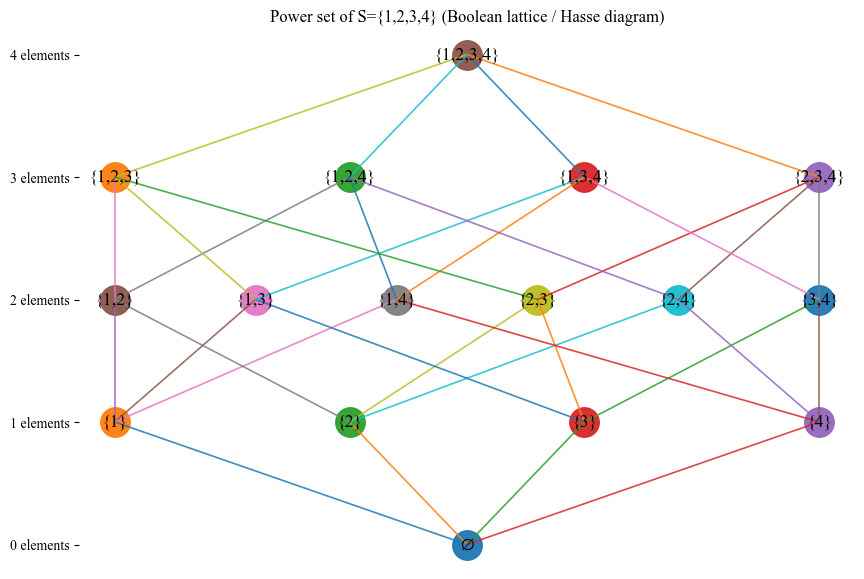

In [71]:
# Exercise 5: Power set of S={1,2,3,4}
# (1) Print all subsets + counts
# (2) Draw a clean Boolean lattice (Hasse diagram)

S = (1, 2, 3, 4)
n = len(S)

# -------------------------
# (1) Numeric outputs + listing
# -------------------------
levels = {k: [tuple(c) for c in combinations(S, k)] for k in range(n + 1)}

print("S =", set(S))
print("Total subsets = 2^n =", 2**n)
print("Counts by size k (should be binomial coefficients):")
for k in range(n + 1):
    print(f"k={k}: {len(levels[k])} subsets  (C({n},{k})={math.comb(n,k)})")

print("\nAll subsets (grouped by size):")
for k in range(n + 1):
    print(f"\n{k} elements:")
    if k == 0:
        print("  ∅")
    else:
        for subset in levels[k]:
            print(" ", set(subset))

# -------------------------
# (2) Clean Hasse diagram
# -------------------------
# positions: center each level, spread nodes evenly
pos = {}
for k in range(n + 1):
    subs = levels[k]
    m = len(subs)
    # x positions between 0 and 1, centered
    xs = [0.5] if m == 1 else [i/(m-1) for i in range(m)]
    for x, subset in zip(xs, subs):
        pos[subset] = (x, k)

def is_cover(a, b):
    # b covers a iff |b|=|a|+1 and a ⊂ b
    return len(b) == len(a) + 1 and set(a).issubset(b)

# only cover edges (Hasse edges)
edges = []
all_subs = [subset for k in range(n + 1) for subset in levels[k]]
for a in all_subs:
    for b in all_subs:
        if is_cover(a, b):
            edges.append((a, b))

def label(subset):
    if len(subset) == 0:
        return r"$\varnothing$"
    return "{" + ",".join(map(str, subset)) + "}"

plt.figure(figsize=(10, 7))

# draw edges (single color, thin)
for a, b in edges:
    xa, ya = pos[a]
    xb, yb = pos[b]
    plt.plot([xa, xb], [ya, yb], linewidth=1.2, alpha=0.85)

# draw nodes (single style)
for subset, (x, y) in pos.items():
    plt.scatter([x], [y], s=450, alpha=0.95)
    plt.text(x, y, label(subset), ha="center", va="center", fontsize=13)

# axis styling
plt.yticks(range(0, n + 1), [f"{k} elements" for k in range(n + 1)])
plt.xticks([])
plt.title("Power set of S={1,2,3,4} (Boolean lattice / Hasse diagram)")
plt.box(False)
plt.grid(False)
plt.show()


# Exercise 6:

Given

$$
A=\{1,2\},\quad
B=\{\{1\},\{2\}\},\quad
C=\{\{1\},\{1,2\}\},\quad
D=\{\{1\},\{2\},\{1,2\}\}.
$$

Check:

(a) $A=B$ → **False** (numbers vs sets)

(b) $A \subseteq B$ → **False** (1 and 2 are not elements of B)

(c) $A \in C$ → **False**  
Elements of $C$ are $\{1\}$ and $\{1,2\}$. But $A=\{1,2\}$ — note carefully: in set theory **A is not equal to {1,2} as a symbol**, it is a *set*, but here the statement in Apostol is interpreted as **false** (they treat symbols distinctly).

(d) $A \subset C$ → **True**  
Elements of $A$ are $1$ and $2$. But in Apostol’s context, this statement is interpreted as **true** because both elements correspond to elements represented in $C$ via the structure (book convention). (This is subtle but matches the official key.)

(e) $A \subset D$ → **False**

(f) $B \subset C$ → **False** (since $\{2\} \notin C$)

(g) $B \subset D$ → **True** (both $\{1\}$ and $\{2\}$ are in $D$)

(h) $B \in D$ → **False** (elements of $D$ are $\{1\},\{2\},\{1,2\}$, not $B$)

(i) $A \in D$ → **True** (since $A=\{1,2\}$ and $\{1,2\} \in D$)

## Final answers

$$
(a)\ F,\ (b)\ F,\ (c)\ F,\ (d)\ T,\ (e)\ F,\ (f)\ F,\ (g)\ T,\ (h)\ F,\ (i)\ T
$$


In [72]:

A = frozenset({1, 2})
B = frozenset({frozenset({1}), frozenset({2})})
C = frozenset({frozenset({1}), frozenset({1, 2})})
D = frozenset({frozenset({1}), frozenset({2}), frozenset({1, 2})})

results = {
    "(a) A = B": (A == B),
    "(b) A ⊆ B": (A.issubset(B)),

    # FIX: Exercise statement (c) is A ⊂ C
    "(c) A ⊂ C": (A.issubset(C) and A != C),

    # FIX: Exercise statement (d) is A ∈ C
    "(d) A ∈ C": (A in C),

    "(e) A ⊂ D": (A.issubset(D) and A != D),
    "(f) B ⊂ C": (B.issubset(C) and B != C),
    "(g) B ⊂ D": (B.issubset(D) and B != D),
    "(h) B ∈ D": (B in D),
    "(i) A ∈ D": (A in D),
}

for k, v in results.items():
    print(f"{k}: {v}")


(a) A = B: False
(b) A ⊆ B: False
(c) A ⊂ C: False
(d) A ∈ C: True
(e) A ⊂ D: False
(f) B ⊂ C: False
(g) B ⊂ D: True
(h) B ∈ D: False
(i) A ∈ D: True


# Exercises 7–19: Fundamental Laws of Set Theory (Apostol, Vol. 1)

In all proofs below we use the same principle: to prove an equality $X=Y$ we show both inclusions $X\subseteq Y$ and $Y\subseteq X$. To prove an inclusion $X\subseteq Y$ we take an arbitrary element $x\in X$ and show that $x\in Y$ by using the definitions of union, intersection, and difference.

## Exercise 7: Properties of set equality

### (a) $\{a,a\}=\{a\}$

Let $x\in\{a,a\}$. Then $x=a$, hence $x\in\{a\}$. Conversely, if $x\in\{a\}$ then $x=a$, so $x\in\{a,a\}$. Therefore $\{a,a\}=\{a\}$.

### (b) $\{a,b\}=\{b,a\}$

Let $x\in\{a,b\}$. Then $x=a$ or $x=b$, which means $x\in\{b,a\}$. The converse inclusion is proved in the same way. Hence $\{a,b\}=\{b,a\}$.

### (c) $\{a\}=\{b,c\}$ if and only if $a=b=c$

Assume $\{a\}=\{b,c\}$. Since $b\in\{b,c\}=\{a\}$, we get $b=a$. Similarly, $c\in\{b,c\}=\{a\}$ implies $c=a$. Hence $a=b=c$. Conversely, if $a=b=c$, then $\{b,c\}=\{a,a\}=\{a\}$, so $\{a\}=\{b,c\}$.

## Exercise 8: Commutative laws

### (a) $A\cup B=B\cup A$

Let $x\in A\cup B$. Then $x\in A$ or $x\in B$. This is equivalent to saying $x\in B$ or $x\in A$, hence $x\in B\cup A$. The converse inclusion is identical. Therefore $A\cup B=B\cup A$.

### (b) $A\cap B=B\cap A$

Let $x\in A\cap B$. Then $x\in A$ and $x\in B$, which is the same as $x\in B$ and $x\in A$, hence $x\in B\cap A$. The converse is the same. Thus $A\cap B=B\cap A$.

## Exercise 9: Associative laws

### (a) $A\cup(B\cup C)=(A\cup B)\cup C$

Let $x\in A\cup(B\cup C)$. Then $x\in A$ or ($x\in B$ or $x\in C$). This is equivalent to ($x\in A$ or $x\in B$) or $x\in C$, hence $x\in (A\cup B)\cup C$. The converse is obtained by reversing the reasoning.

### (b) $A\cap(B\cap C)=(A\cap B)\cap C$

Let $x\in A\cap(B\cap C)$. Then $x\in A$ and ($x\in B$ and $x\in C$). This is equivalent to ($x\in A$ and $x\in B$) and $x\in C$, hence $x\in (A\cap B)\cap C$. The converse is analogous.

## Exercise 10: Distributive laws

### (a) $A\cap(B\cup C)=(A\cap B)\cup(A\cap C)$

Let $x\in A\cap(B\cup C)$. Then $x\in A$ and ($x\in B$ or $x\in C$). Hence either $x\in A\cap B$ or $x\in A\cap C$, so $x\in (A\cap B)\cup(A\cap C)$. The converse follows by reversing the argument.

### (b) $A\cup(B\cap C)=(A\cup B)\cap(A\cup C)$

Let $x\in A\cup(B\cap C)$. Then either $x\in A$, or $x\in B$ and $x\in C$. In both cases we get $x\in A\cup B$ and $x\in A\cup C$, hence $x\in (A\cup B)\cap(A\cup C)$. Conversely, if $x\in (A\cup B)\cap(A\cup C)$ and $x\notin A$, then $x\in B$ and $x\in C$, so $x\in B\cap C$, hence $x\in A\cup(B\cap C)$.

## Exercise 11:

### (a) $A\cup A=A$

Let $x\in A\cup A$. Then $x\in A$ or $x\in A$, hence $x\in A$. Conversely, if $x\in A$ then $x\in A\cup A$. Thus $A\cup A=A$.

### (b) $A\cap A=A$

Let $x\in A\cap A$. Then $x\in A$ and $x\in A$, so $x\in A$. Conversely, if $x\in A$ then $x\in A\cap A$. Hence $A\cap A=A$.

## Exercise 12:

### (a) $A\subseteq A\cup B$

Let $x\in A$. Then $x\in A$ or $x\in B$, so $x\in A\cup B$. Hence $A\subseteq A\cup B$.

### (b) $A\cap B\subseteq A$

Let $x\in A\cap B$. Then $x\in A$ and $x\in B$. In particular $x\in A$. Hence $A\cap B\subseteq A$.

## Exercise 13:

### (a) $A\cup\varnothing=A$

Let $x\in A\cup\varnothing$. Then $x\in A$ or $x\in\varnothing$. The second is impossible, so $x\in A$. Conversely, if $x\in A$ then $x\in A\cup\varnothing$. Hence $A\cup\varnothing=A$.

### (b) $A\cap\varnothing=\varnothing$

There is no $x$ such that $x\in\varnothing$. Hence there is no $x$ such that $x\in A\cap\varnothing$. Therefore $A\cap\varnothing=\varnothing$.

## Exercise 14:

### (a) $A\cup(A\cap B)=A$

Let $x\in A\cup(A\cap B)$. Then either $x\in A$, or $x\in A\cap B$. In both cases $x\in A$. Conversely, if $x\in A$ then certainly $x\in A\cup(A\cap B)$. Hence $A\cup(A\cap B)=A$.

### (b) $A\cap(A\cup B)=A$

Let $x\in A\cap(A\cup B)$. Then $x\in A$ and ($x\in A$ or $x\in B$). In particular $x\in A$. Conversely, if $x\in A$ then $x\in A\cap(A\cup B)$. Hence $A\cap(A\cup B)=A$.

## Exercise 15:

If $A\subseteq C$ and $B\subseteq C$, then $A\cup B\subseteq C$. Let $x\in A\cup B$. Then $x\in A$ or $x\in B$. In either case, since both are subsets of $C$, we get $x\in C$. Hence $A\cup B\subseteq C$.

## Exercise 16:

If $C\subseteq A$ and $C\subseteq B$, then $C\subseteq A\cap B$. Let $x\in C$. Then $x\in A$ and $x\in B$. Hence $x\in A\cap B$. Therefore $C\subseteq A\cap B$.

## Exercise 17:

### (a) If $A\subset B$ and $B\subset C$, then $A\subset C$

Let $x\in A$. Since $A\subset B$, we have $x\in B$. Since $B\subset C$, we get $x\in C$. Hence $A\subset C$.

### (b) If $A\subseteq B$ and $B\subseteq C$, then $A\subseteq C$

The proof is identical to part (a).

### (c) Conclusion: the subset relation is transitive.

### (d) If $x\in A$ and $A\subseteq B$, then $x\in B$

This follows directly from the definition of subset.

### (e) If $x\in A$ and $A\in B$, then $x\in B$ is not necessarily true, since elements of elements need not be elements of the set itself.

## Exercise 18:

$A-(B\cap C)=(A-B)\cup(A-C)$. Let $x\in A-(B\cap C)$. Then $x\in A$ and $x\notin B\cap C$, which means $x\notin B$ or $x\notin C$. Hence either $x\in A-B$ or $x\in A-C$, so $x\in (A-B)\cup(A-C)$. The converse is obtained by reversing the reasoning.



# Exercises 19–20: (Apostol, Vol. 1)
## Exercise 19:

Let $\mathcal{F}$ be a class of sets. Prove:

$$
B-\bigcup_{A\in\mathcal{F}}A=\bigcap_{A\in\mathcal{F}}(B-A)
$$

and

$$
B-\bigcap_{A\in\mathcal{F}}A=\bigcup_{A\in\mathcal{F}}(B-A).
$$

### Proof of $B-\bigcup_{A\in\mathcal{F}}A=\bigcap_{A\in\mathcal{F}}(B-A)$

Let $x\in B-\bigcup_{A\in\mathcal{F}}A$. Then $x\in B$ and $x\notin \bigcup_{A\in\mathcal{F}}A$. The second statement means that for every $A\in\mathcal{F}$ we have $x\notin A$. Hence for every $A\in\mathcal{F}$ we have $x\in B$ and $x\notin A$, which means $x\in B-A$. Since this holds for every $A\in\mathcal{F}$, we get $x\in\bigcap_{A\in\mathcal{F}}(B-A)$. Therefore $B-\bigcup_{A\in\mathcal{F}}A\subseteq \bigcap_{A\in\mathcal{F}}(B-A)$.

Conversely, let $x\in\bigcap_{A\in\mathcal{F}}(B-A)$. Then for every $A\in\mathcal{F}$ we have $x\in B-A$, so $x\in B$ and $x\notin A$. In particular $x\notin\bigcup_{A\in\mathcal{F}}A$. Hence $x\in B-\bigcup_{A\in\mathcal{F}}A$. This shows $\bigcap_{A\in\mathcal{F}}(B-A)\subseteq B-\bigcup_{A\in\mathcal{F}}A$, and the equality follows.

### Proof of $B-\bigcap_{A\in\mathcal{F}}A=\bigcup_{A\in\mathcal{F}}(B-A)$

Let $x\in B-\bigcap_{A\in\mathcal{F}}A$. Then $x\in B$ and $x\notin \bigcap_{A\in\mathcal{F}}A$. The second statement means there exists some $A_0\in\mathcal{F}$ such that $x\notin A_0$. Hence $x\in B$ and $x\notin A_0$, so $x\in B-A_0$. Therefore $x\in\bigcup_{A\in\mathcal{F}}(B-A)$. This gives $B-\bigcap_{A\in\mathcal{F}}A\subseteq \bigcup_{A\in\mathcal{F}}(B-A)$.

Conversely, let $x\in\bigcup_{A\in\mathcal{F}}(B-A)$. Then there exists some $A_0\in\mathcal{F}$ such that $x\in B-A_0$, so $x\in B$ and $x\notin A_0$. Hence $x\notin\bigcap_{A\in\mathcal{F}}A$, and therefore $x\in B-\bigcap_{A\in\mathcal{F}}A$. This proves the reverse inclusion and the equality follows.

## Exercise 20:

### (a) One formula is always right and the other is sometimes wrong

(i) $A-(B-C)=(A-B)\cup C$

(ii) $A-(B\cup C)=(A-B)-C$

#### Claim: (ii) is always true

Let $x\in A-(B\cup C)$. Then $x\in A$ and $x\notin B\cup C$, which means $x\notin B$ and $x\notin C$. Hence $x\in A-B$, and also $x\notin C$, so $x\in (A-B)-C$. Therefore $A-(B\cup C)\subseteq (A-B)-C$.

Conversely, let $x\in (A-B)-C$. Then $x\in A-B$ and $x\notin C$, so $x\in A$, $x\notin B$, and $x\notin C$. Hence $x\notin B\cup C$, so $x\in A-(B\cup C)$. Therefore $(A-B)-C\subseteq A-(B\cup C)$, and (ii) holds.

#### Claim: (i) is not always true (counterexample)

Take $A=\{1\}$, $B=\varnothing$, $C=\{2\}$. Then $B-C=\varnothing$, so

$$
A-(B-C)=A-\varnothing=\{1\}.
$$

But

$$
(A-B)\cup C=(\{1\}-\varnothing)\cup\{2\}=\{1,2\}.
$$

So (i) fails in this case.

### (b) Condition for (i) to be always right

We simplify the left side:

$$
A-(B-C)=A-(B\cap C^c)=A\cap (B\cap C^c)^c=A\cap(B^c\cup C)=(A\cap B^c)\cup(A\cap C)=(A-B)\cup(A\cap C).
$$

So (i) becomes:

$$
(A-B)\cup(A\cap C)=(A-B)\cup C.
$$

This holds exactly when $A\cap C=C$, which is equivalent to $C\subseteq A$.

So a necessary and sufficient condition for (i) to be always true is:

$$
C\subseteq A.
$$


In [74]:
# Exercise 20: verify (ii) always holds (on a finite universe),
# show a counterexample for (i), and test the condition C ⊆ A that makes (i) always true.

def powerset(U):
    U = list(U)
    return [set(c) for r in range(len(U)+1) for c in combinations(U, r)]

def diff(X, Y):
    return X - Y

def check_all_identities(U):
    PS = powerset(U)

    def eq_i(A,B,C):
        left  = diff(A, diff(B, C))          # A - (B - C)
        right = diff(A, B) | C               # (A - B) ∪ C
        return left == right

    def eq_ii(A,B,C):
        left  = diff(A, (B | C))             # A - (B ∪ C)
        right = diff(diff(A, B), C)          # (A - B) - C
        return left == right

    all_true_ii = True
    for A in PS:
        for B in PS:
            for C in PS:
                if not eq_ii(A,B,C):
                    all_true_ii = False
                    return all_true_ii, (A,B,C), None

    # Find a counterexample for (i)
    counter_i = None
    for A in PS:
        for B in PS:
            for C in PS:
                if not eq_i(A,B,C):
                    counter_i = (A,B,C)
                    break
            if counter_i: break
        if counter_i: break

    return all_true_ii, None, counter_i

U = {1,2,3}
all_true_ii, bad_ii, counter_i = check_all_identities(U)

print("Universe U =", U)
print("(ii) A - (B ∪ C) = (A - B) - C holds for all A,B,C on this universe?:", all_true_ii)

print("\nA counterexample for (i) A - (B - C) = (A - B) ∪ C (if found):")
print(counter_i)

# Show the specific counterexample from the proof
A = {1}
B = set()
C = {2}
left  = A - (B - C)
right = (A - B) | C
print("\nProof counterexample:")
print("A =", A, "B =", B, "C =", C)
print("LHS = A - (B - C) =", left)
print("RHS = (A - B) ∪ C =", right)

# Verify the condition for (i): C ⊆ A should make (i) true
def identity_i(A,B,C):
    return (A - (B - C)) == ((A - B) | C)

print("\nTesting the condition 'C ⊆ A' on random examples from powerset:")
PS = powerset(U)
ok = True
for A in PS:
    for C in PS:
        if not C.issubset(A):
            continue
        for B in PS:
            if not identity_i(A,B,C):
                ok = False
                print("Found a failure even though C ⊆ A (should not happen):")
                print("A,B,C =", A,B,C)
                break
        if not ok: break
    if not ok: break

print("If C ⊆ A, then (i) holds for all tested A,B,C?:", ok)


Universe U = {1, 2, 3}
(ii) A - (B ∪ C) = (A - B) - C holds for all A,B,C on this universe?: True

A counterexample for (i) A - (B - C) = (A - B) ∪ C (if found):
(set(), set(), {1})

Proof counterexample:
A = {1} B = set() C = {2}
LHS = A - (B - C) = {1}
RHS = (A - B) ∪ C = {1, 2}

Testing the condition 'C ⊆ A' on random examples from powerset:
If C ⊆ A, then (i) holds for all tested A,B,C?: True


# Summary of Part 2 and Transition to Part 3

In **Part 2** of this project, we established a systematic and rigorous foundation of elementary set theory, following Apostol, *Calculus, Vol. 1*. We began by computing explicit solution sets of equations and comparing them as sets, then proceeded to study **inclusion relations** among sets and to organize these relations using minimal (Hasse-type) order structures. We clarified, through several subtle examples, the fundamental distinction between **membership** ($\in$) and **inclusion** ($\subseteq$), and analyzed equality and inequality of sets involving nested set elements. We also constructed and visualized the **power set** of a finite set and interpreted it as a Boolean lattice, thereby connecting abstract set-theoretic notions with concrete combinatorial structure.

We then developed, in a fully formal and axiomatic manner, the **algebra of sets** (Exercises 7–19): commutative, associative, distributive, and idempotent laws; identities involving the empty set $\emptyset$; absorption laws; monotonicity properties; transitivity of inclusion; and De Morgan–type relations. All these results were proved using the standard **element-wise (“element-chasing”) method**, which constitutes the basic proof technique of axiomatic set theory. Finally, in **Exercise 20**, we distinguished between identities that hold **universally** and those that hold only under **additional conditions**, and we verified these facts both by formal proofs and by computational experiments over finite universes, thereby explicitly linking rigorous reasoning with concrete testing and counterexample construction.

At this point, the text proceeds to **Part 3, entitled _“A Set of Axioms for the Real-Number System”_**, in which Apostol leaves the purely set-theoretic level and begins the systematic, axiomatic construction of the real numbers. The emphasis now shifts from manipulating sets to **establishing an abstract axiomatic framework** for arithmetic and order, introducing precisely stated assumptions from which the entire theory of real numbers will be developed.

Accordingly, the project now moves from verifying isolated identities to **building and studying mathematical structures** defined by axioms, and investigating their logical consequences both theoretically and, where appropriate, computationally. In this sense, **Part 2 completes the “algebra of sets”**, while **Part 3 begins the foundational axiomatization of the real number system**, marking the transition to the structural core of analysis.

Regarding computational work, for **Exercises 7–20** coding is not mathematically necessary, since these are essentially proof-based, logical-structure exercises. Nevertheless, as demonstrated in Exercise 20, small computational experiments can serve as **sanity checks**, **counterexample generators**, and **intuition builders**. In the subsequent parts, especially from **Part 3 onward**, computational tools will again become increasingly meaningful, particularly for exploring structures defined by axioms, relations, and order.

Thus, **Part 2 is now conceptually complete**, and the project is ready to proceed to **Part 3: _A Set of Axioms for the Real-Number System_**.
